In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

In [65]:
games = pd.read_csv('games-train.csv', index_col= 0)
games

,original_price,discount_price,discount_percentage,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,...,Developer_PC2,Developer_PC3,Developer_PC4,Developer_PC5,Publisher_PC1,Publisher_PC2,Publisher_PC3,Publisher_PC4,Publisher_PC5,status
0,19.99,14.99,25.012506,1,0,0,0,0,0,0,...,-0.008313,0.000069,-0.009827,-0.006300,-0.047265,-0.049798,-0.016603,-0.007283,-0.029931,good
1,29.99,29.99,0.000000,1,1,0,1,0,0,0,...,-0.006333,0.000001,-0.006472,-0.003492,-0.046366,-0.043805,-0.008096,-0.003144,-0.012810,bad
2,39.99,39.99,0.000000,1,1,0,0,0,0,0,...,-0.006687,0.000002,-0.006995,-0.003871,-0.047440,-0.051125,-0.020750,-0.009496,-0.040103,good
3,44.99,44.99,0.000000,1,1,0,1,0,0,0,...,-0.008316,0.000172,-0.009881,-0.007579,-0.046718,-0.046000,-0.010165,-0.004037,-0.016567,bad
4,0.00,0.00,0.000000,1,0,0,1,1,0,0,...,-0.006687,0.000002,-0.006995,-0.003871,-0.046427,-0.044171,-0.008393,-0.003269,-0.013336,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40481,13.99,13.99,0.000000,1,1,1,0,0,0,0,...,-0.006333,0.000001,-0.006472,-0.003492,-0.046366,-0.043805,-0.008096,-0.003144,-0.012810,good
40524,2.99,2.99,0.000000,1,1,0,0,0,0,0,...,-0.006333,0.000001,-0.006472,-0.003492,-0.046366,-0.043805,-0.008096,-0.003144,-0.012810,good
40598,14.99,14.99,0.000000,0,0,0,0,0,0,1,...,-0.006418,0.000001,-0.006595,-0.003580,-0.046381,-0.043896,-0.008169,-0.003174,-0.012938,good
40611,7.99,7.99,0.000000,0,1,0,0,0,0,0,...,-0.006333,0.000001,-0.006472,-0.003492,-0.046366,-0.043805,-0.008096,-0.003144,-0.012810,good


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [67]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
X = games.drop(['status'], axis = 1) 
y = games['status']

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [68]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Logistic Regression object
LogisticR= LogisticRegression(max_iter=1000)      # set the maximum depth of each tree

# Fit Logistic Regression on Train Data
LogisticR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Train Data
Accuracy  :	 0.6638044914134742

TPR Train :	 0.9539898132427844
TNR Train :	 0.12867877269881026

FPR Train :	 0.8713212273011898
FNR Train :	 0.04601018675721562


<AxesSubplot:>

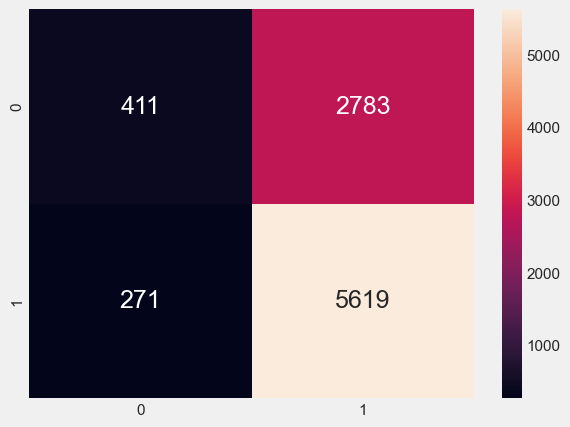

In [69]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = LogisticR.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", LogisticR.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}) 

Test Data
Accuracy  :	 0.6578599735799208

TPR Test :	 0.949898442789438
TNR Test :	 0.11460957178841309

FPR Test :	 0.8853904282115869
FNR Test :	 0.05010155721056195


<AxesSubplot:>

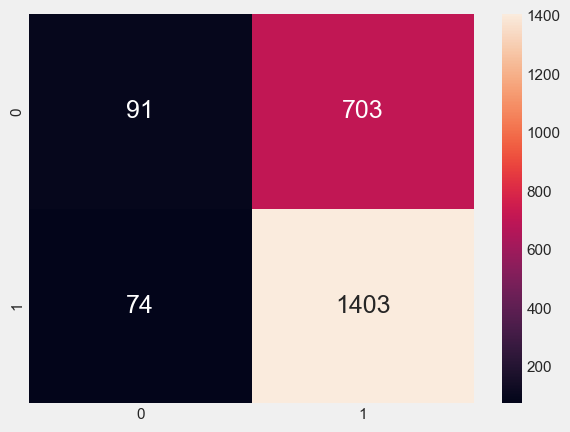

In [70]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = LogisticR.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", LogisticR.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Random Forest Regressor

In [71]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = games['status']
X = games.drop('status', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [72]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=1000)

Train Data
Accuracy  :	 0.7973074987418218

TPR Train :	 0.9764362220058422
TNR Train :	 0.47031638819765376

FPR Train :	 0.5296836118023462
FNR Train :	 0.02356377799415774


<AxesSubplot:>

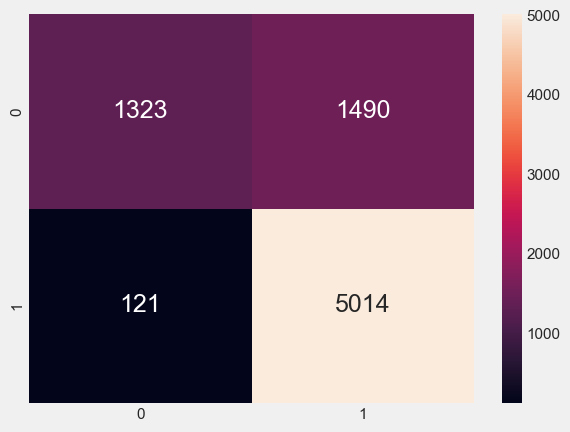

In [73]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6821250366891694

TPR Test :	 0.9068100358422939
TNR Test :	 0.2553191489361702

FPR Test :	 0.7446808510638298
FNR Test :	 0.0931899641577061


<AxesSubplot:>

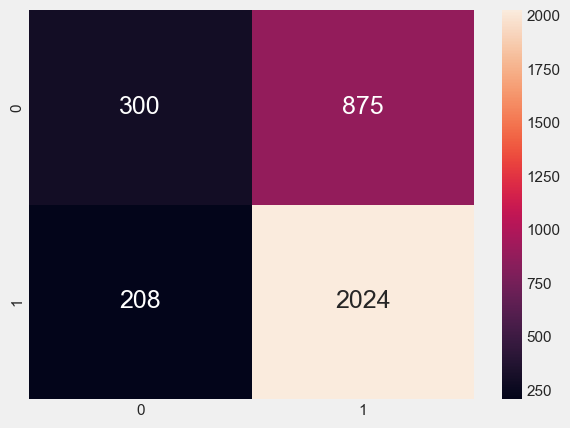

In [74]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})